# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
import json

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kolonia
Processing Record 2 of Set 1 | utrik
Processing Record 3 of Set 1 | college
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 6 of Set 1 | lautoka
Processing Record 7 of Set 1 | oroqen zizhiqi
Processing Record 8 of Set 1 | ust-tsilma
Processing Record 9 of Set 1 | ust-nera
Processing Record 10 of Set 1 | san luis de la loma
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | fort mcmurray
Processing Record 13 of Set 1 | atafu village
Processing Record 14 of Set 1 | port saint john's
Processing Record 15 of Set 1 | salinopolis
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | tura
Processing Record 20 of Set 1 | enewetak
Processing Record 21 of Set 1 | kununurra
Pr

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kolonia,50.9333,6.9500,282.11,88,0,1.03,DE,1728674792
1,utrik,11.2278,169.8474,300.83,80,100,8.63,MH,1728674996
2,college,64.8569,-147.8028,276.43,82,20,1.54,US,1728674998
3,ribeira grande,38.5167,-28.7000,292.37,59,40,4.63,PT,1728674999
4,lautoka,-17.6167,177.4667,297.07,83,75,0.00,FJ,1728675002


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kolonia,50.9333,6.9500,282.11,88,0,1.03,DE,1728674792
1,utrik,11.2278,169.8474,300.83,80,100,8.63,MH,1728674996
2,college,64.8569,-147.8028,276.43,82,20,1.54,US,1728674998
3,ribeira grande,38.5167,-28.7000,292.37,59,40,4.63,PT,1728674999
4,lautoka,-17.6167,177.4667,297.07,83,75,0.00,FJ,1728675002


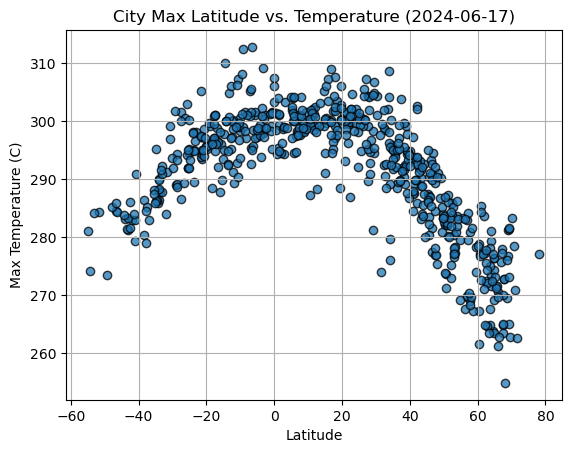

In [8]:
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],edgecolor='black',alpha=0.75)

# Incorporate the other graph properties
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.title('City Max Latitude vs. Temperature (2024-06-17)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

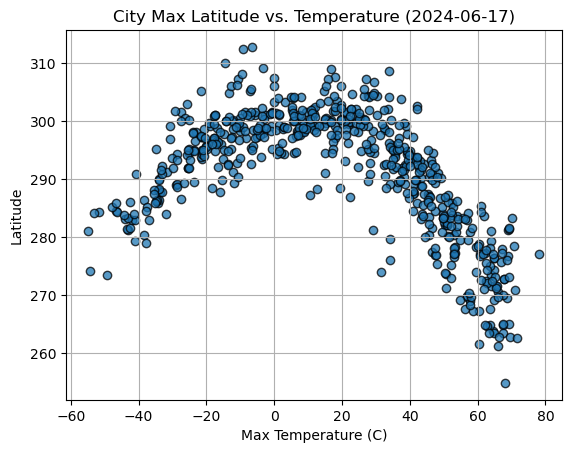

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],edgecolor='black',alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Max Temperature (C)')
plt.ylabel('Latitude')
plt.title('City Max Latitude vs. Temperature (2024-06-17)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

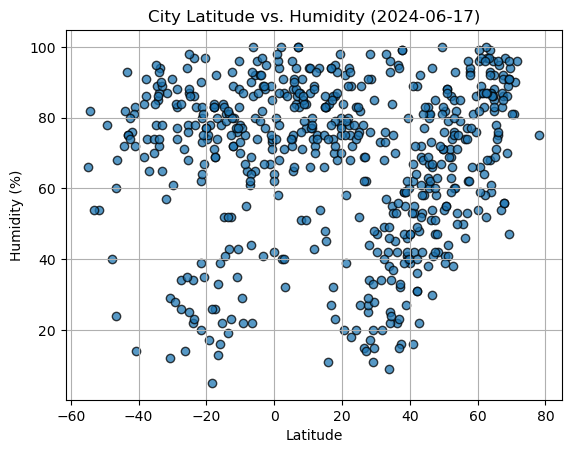

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'],edgecolor='black',alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2024-06-17)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

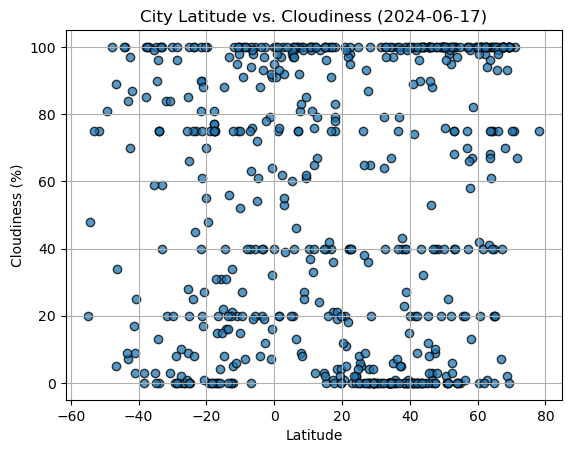

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],edgecolor='black',alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2024-06-17)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

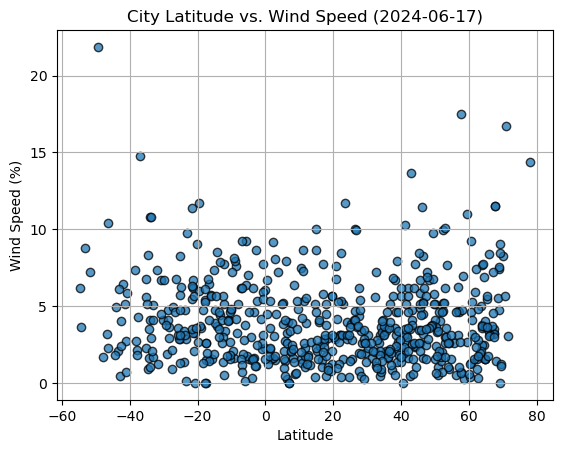

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],edgecolor='black',alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.title('City Latitude vs. Wind Speed (2024-06-17)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [64]:
# Define a function to create Linear Regression plots
def linear_reggression_function(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue**2}")

    x_coord = x_values.min() * 1.05
    y_coord = y_values.min() * 1.1
    plt.annotate(line_eq,(x_coord,y_coord),fontsize=15,color="red")

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kolonia,50.9333,6.9500,282.11,88,0,1.03,DE,1728674792
1,utrik,11.2278,169.8474,300.83,80,100,8.63,MH,1728674996
2,college,64.8569,-147.8028,276.43,82,20,1.54,US,1728674998
3,ribeira grande,38.5167,-28.7000,292.37,59,40,4.63,PT,1728674999
5,oroqen zizhiqi,50.5667,123.7167,273.67,55,2,3.29,CN,1728675004


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,lautoka,-17.6167,177.4667,297.07,83,75,0.00,FJ,1728675002
9,adamstown,-25.0660,-130.1015,294.51,87,66,5.70,PN,1728675010
11,atafu village,-8.5421,-172.5159,301.53,75,7,7.63,TK,1728674775
12,port saint john's,-31.6229,29.5448,291.25,87,20,1.22,ZA,1728675014
13,salinopolis,-0.6136,-47.3561,301.51,73,32,7.74,BR,1728674791


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7034756354509492


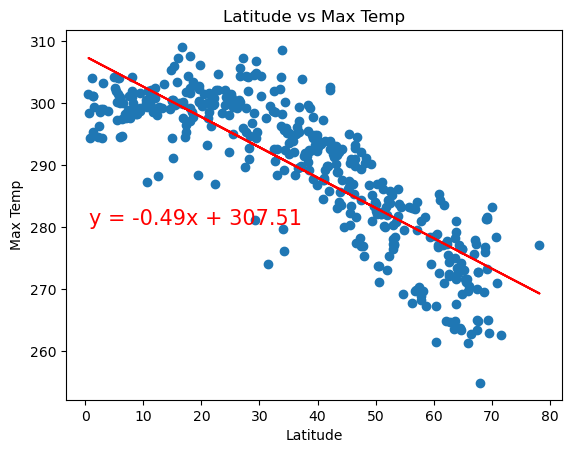

In [65]:
# Linear regression on Northern Hemisphere
linear_reggression_function(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs Max Temp')
plt.show()

The r-squared is: 0.6180265654745746


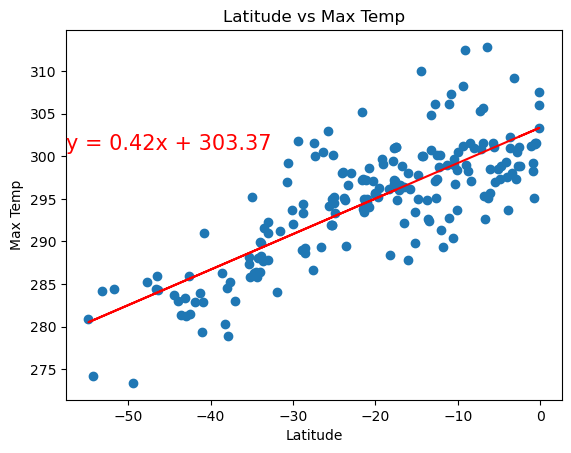

In [66]:
# Linear regression on Southern Hemisphere
linear_reggression_function(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs Max Temp')
plt.show()

**Discussion about the linear relationship:** In the southern hemisphere, as the latitude increases so does the max temperature. In the northern hemisphere, as the latitude increases the max temperature decreases. This is because from the southern hemisphere, as the latitude increases to 0, you approach the equator which has higher temperatures but from the nothern hemisphere, as the latitude increases to 80, you approach the north pole which has lower temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0016014446677643777


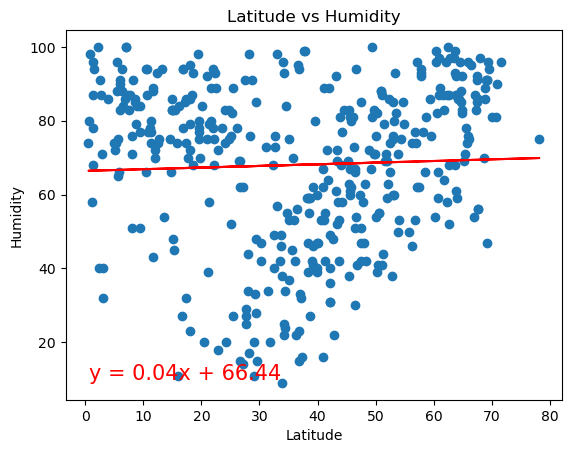

In [67]:
# Northern Hemisphere
linear_reggression_function(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity')
plt.show()

The r-squared is: 0.000413624523842045


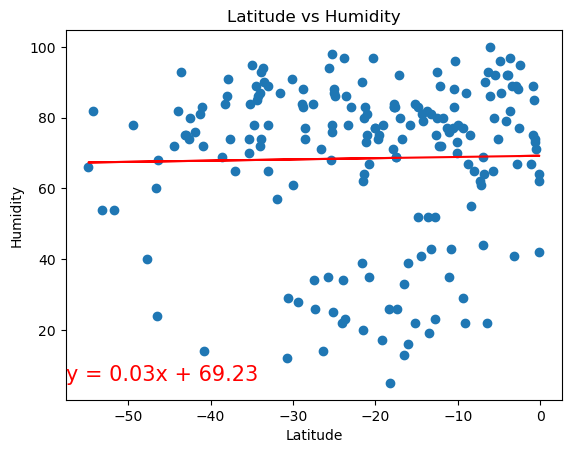

In [73]:
# Southern Hemisphere
linear_reggression_function(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity')
plt.show()

**Discussion about the linear relationship:** For both the nothern and southern hemisphere, the r^2 value is small which indicates that humidity has little to no linear relationship to latitude. You can also see from the scatter plot that there is no relationship between humidity and latitude, with the points having high variability. In addition, the slope of the equation is quite small which indicates latitude might have only a slight influence on humitity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.008472638587101074


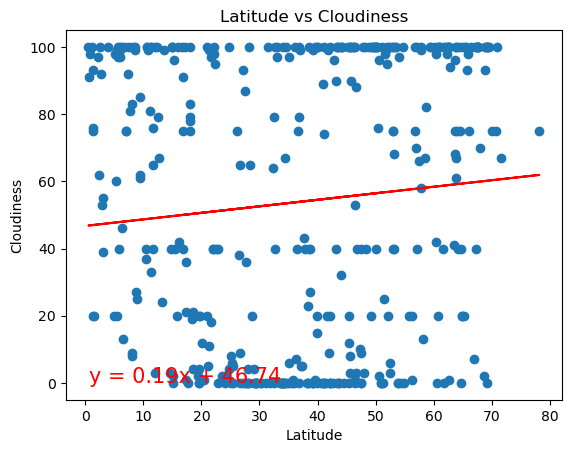

In [69]:
# Northern Hemisphere
linear_reggression_function(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')
plt.show()

The r-squared is: 0.00020213074834125728


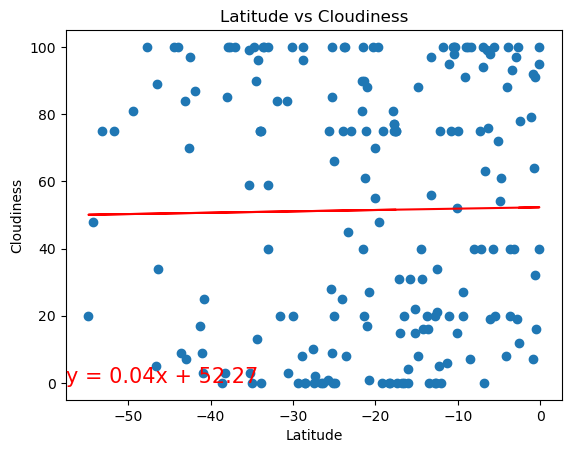

In [70]:
# Southern Hemisphere
linear_reggression_function(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')
plt.show()

**Discussion about the linear relationship:** The slope (0.19) in the Northern Hemisphere is larger than in the Southern Hemisphere (0.04), indicating that latitude has a more noticeable impact on cloudiness in the Northern Hemisphere. Moving northward increases cloudiness at a faster rate compared to moving southward in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.027005970360022367


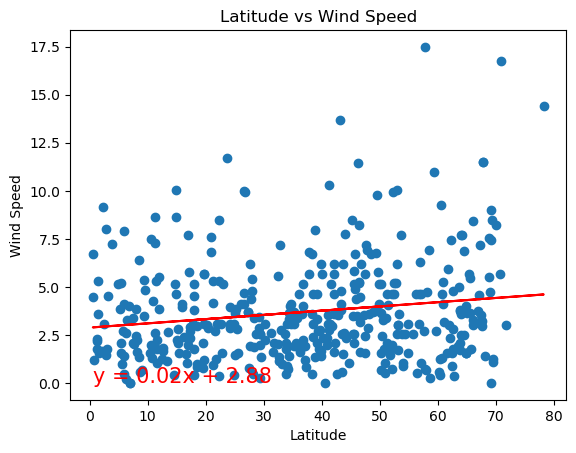

In [72]:
# Northern Hemisphere
linear_reggression_function(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')
plt.show()

The r-squared is: 0.02160466670142928


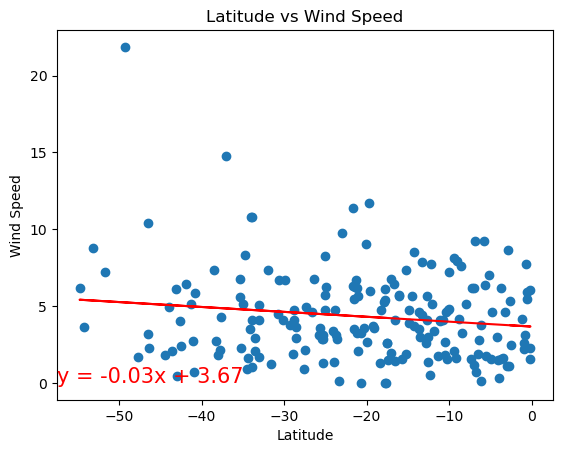

In [71]:
# Southern Hemisphere
linear_reggression_function(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, wind speeds increase as the latitude increases, approaching the north pole which generally has a colder climate. In the sountern hemisphere, wind speeds decreases as the latitude increases, approaching the equator which generally has a warmer climate. This can be seen by the positive slope of the northern hemisphere plot and the negative slope of the southern hemisphere plot.